In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [2]:
file_path=r"C:\Users\AKSHITHA\OneDrive\Projects-2-2\Iai\u-1\Crop_recommendation.csv"
df=pd.read_csv(file_path)

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Select relevant features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[features]

In [5]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [7]:
# Encode crop labels
label_encoder = LabelEncoder()
df['crop_label'] = label_encoder.fit_transform(df['label'])

In [8]:
X_scaled.mean()

np.float64(0.40453693984472544)

In [9]:
def evaluate_partition(clusters, df):
    """Compute the fitness score based on crop suitability."""
    score = 0
    for cluster in np.unique(clusters):
        cluster_data = df[clusters == cluster]
        dominant_crop = cluster_data['crop_label'].mode()[0]  # Most common crop
        score += (cluster_data['crop_label'] == dominant_crop).sum()
    return score

In [10]:
def hill_climbing(X, df, k=5, max_iterations=100):
    """Optimize plot division using Hill-Climbing."""
    best_kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    best_clusters = best_kmeans.labels_
    best_score = evaluate_partition(best_clusters, df)
    
    for _ in range(max_iterations):
        new_kmeans = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(1000)).fit(X)
        new_clusters = new_kmeans.labels_
        new_score = evaluate_partition(new_clusters, df)
        
        if new_score > best_score:
            best_clusters, best_score = new_clusters, new_score
            print(f"Improved score: {best_score}")
    
    return best_clusters


In [11]:
optimized_clusters = hill_climbing(X_scaled, df, k=5)

c:\Users\AKSHITHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\AKSHITHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\AKSHITHA\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AKSHITHA\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, c

In [12]:
def plot_clusters(X, clusters, title, dominant_crops):
    colors = ['yellow', 'purple', 'blue', 'green', 'red']
    cluster_colors = [colors[label] for label in clusters]

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_colors, alpha=0.7)

    # Add cluster labels to legend
    legend_labels = [f'Cluster {i}: {crop}' for i, crop in dominant_crops.items()]
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=colors[i])
               for i in range(len(dominant_crops))]
    
    plt.legend(handles, legend_labels, title="Clusters and Crops")
    plt.title(title)
    plt.xlabel('N (Nitrogen)')
    plt.ylabel('P (Phosphorus)')
    plt.show()


In [13]:
# Get dominant crop for each cluster
df['cluster'] = optimized_clusters
dominant_crops = df.groupby('cluster')['label'].agg(lambda x: x.mode()[0])  # Most common crop per cluster

# Print crop label mapping
for cluster, crop in dominant_crops.items():
    print(f"Cluster {cluster}: {crop}")


Cluster 0: blackgram
Cluster 1: banana
Cluster 2: chickpea
Cluster 3: apple
Cluster 4: coconut


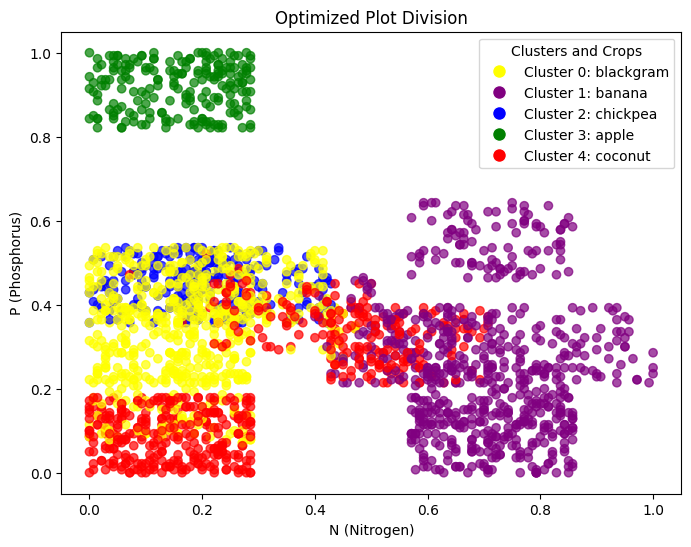

In [14]:
plot_clusters(X_scaled, optimized_clusters, "Optimized Plot Division", dominant_crops)